In [ ]:
import pandas as pd

df = pd.read_pickle("../data/processed/df_with_customer_features.pkl")


In [ ]:
import os
import sys

# Go one level up from notebooks/ to project root
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
sys.path.append(project_root)



from src.train_model import train_model_with_mlflow


In [ ]:
feature_cols = [
    'TX_AMOUNT',
    'is_high_amount',
    'terminal_fraud_count_28d',
    'customer_avg_amount_14d',
    'amount_deviation',
    'TX_HOUR',
    'TX_WEEKDAY'
]

terminal: mlflow ui --port 6006

In [5]:
model, X_test, y_test = train_model_with_mlflow(df, feature_cols)


2025/09/13 15:16:17 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/mlflow/types/utils.py

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    347921
           1       0.71      0.57      0.63      2936

    accuracy                           0.99    350857
   macro avg       0.85      0.78      0.81    350857
weighted avg       0.99      0.99      0.99    350857

ROC AUC: 0.971921130941694


Registered model 'random_forest_model' already exists. Creating a new version of this model...
Created version '6' of model 'random_forest_model'.


In [6]:
import joblib

joblib.dump(model, "../models/fraud_model.pkl")


['../models/fraud_model.pkl']

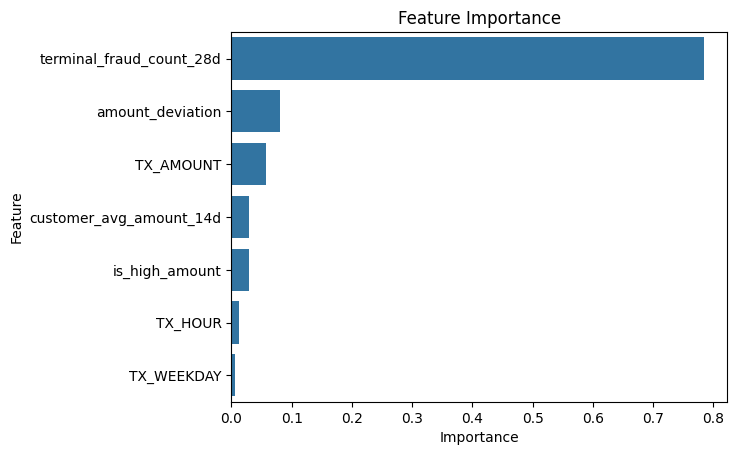

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

importances = model.feature_importances_
feat_imp = pd.Series(importances, index=feature_cols).sort_values(ascending=False)

sns.barplot(x=feat_imp.values, y=feat_imp.index)
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()


## 🧪 Summary

> “Our model achieves a ROC AUC of 0.97, meaning it can distinguish fraud from non-fraud with high confidence. The most important feature is terminal fraud history—suggesting that fraud tends to cluster around compromised terminals. Behavioral anomalies like sudden spikes in spending also play a key role. We track all experiments using MLflow, ensuring reproducibility and transparency.”

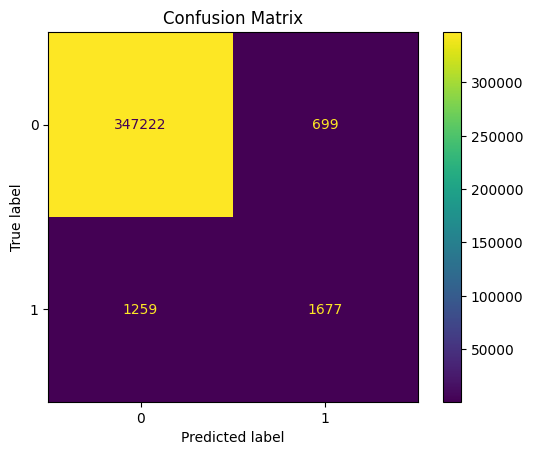

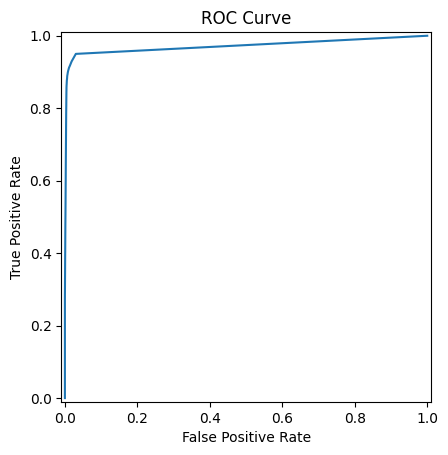

In [8]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, RocCurveDisplay

# Confusion Matrix
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
plt.title("Confusion Matrix")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
plt.title("ROC Curve")
plt.show()


In [9]:
import shap

In [10]:
X_clean = X_test.select_dtypes(include=['int64', 'float64', 'int32', 'bool']).copy()
X_clean = X_clean.astype('float64')
X_sample = X_clean.head(1000)


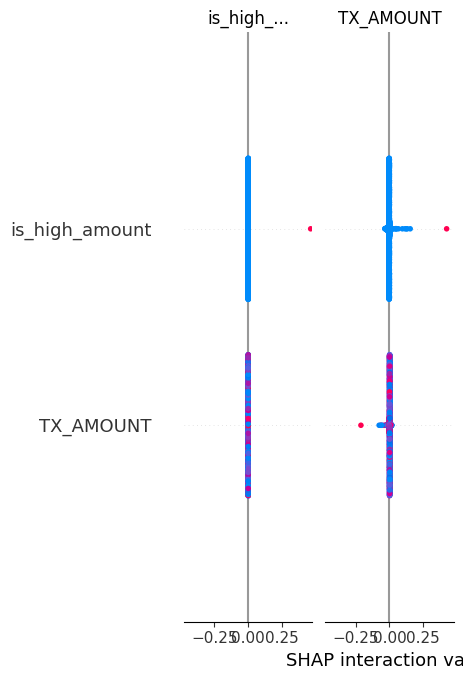

In [11]:


explainer = shap.Explainer(model, X_sample)
shap_values = explainer(X_sample)

shap.summary_plot(shap_values, X_sample, plot_type="bar")



In [14]:
import shap
# Use a single row from your sample
row_index = 0

base_value = shap_values.base_values[row_index]
shap_value_row = shap_values.values[row_index]
feature_row = shap_values.data[row_index]

# Plot
shap.plots.force(explainer.expected_value[0], shap_value_row[...,0])




## 🧠 Presentation

> “SHAP explainability allows us to open the black box and understand why our model predicts fraud. Globally, terminal fraud history and amount deviation are the most influential features. Locally, we can see how each feature contributes to individual predictions—making our model transparent and trustworthy.”


In [15]:
print(model.feature_names_in_)


['TX_AMOUNT' 'is_high_amount' 'terminal_fraud_count_28d'
 'customer_avg_amount_14d' 'amount_deviation' 'TX_HOUR' 'TX_WEEKDAY']
